In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

In [3]:
seed = 42
num_features = 4
num_classes = 3
num_hidden_layer_nodes = 5
lr = 0.01
num_epoch = 1000
batch_size = 50

In [4]:
# Get the dataset
iris = datasets.load_iris()

# X
x_data = iris.data

# Y
ohe = OneHotEncoder()
y_data = ohe.fit_transform(iris.target.reshape(-1, 1)).toarray()

# Test Train split
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.30, 
                                                    random_state=seed)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 3)
(45, 3)


In [6]:
# Weights
w1 = tf.Variable(tf.random_normal([num_features, num_hidden_layer_nodes]))
b1 = tf.Variable(tf.ones(shape=[1, num_hidden_layer_nodes]) * 0.01, dtype=tf.float32)
w2 = tf.Variable(tf.random_normal([num_hidden_layer_nodes, num_classes]))
b2 = tf.Variable(tf.ones([1, num_classes]) * 0.01, dtype=tf.float32)

# Placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None, 4])
y = tf.placeholder(dtype=tf.float32, shape=[None, 3])

# The model
z_hidden = tf.nn.relu(tf.matmul(x, w1))
z_output = tf.nn.relu(tf.matmul(z_hidden, w2) + b2)

In [7]:
# Classifier
xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z_output)
loss = tf.reduce_mean(xentropy)

# Optimizer
opt = tf.train.GradientDescentOptimizer(lr)
train_step = opt.minimize(loss)

In [8]:
loss_train = list()
loss_test = list()

acc_train = list()
acc_test = list()

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_instances = len(x_train)
    
    for i in range(num_epoch):
        
        for ba in range(total_instances // batch_size):
            mask = np.random.choice(total_instances, batch_size)
            x_rand = x_train[mask]
            y_rand = y_train[mask]
            
            sess.run(train_step, feed_dict={x: x_rand, y: y_rand})
            
       
        pred = sess.run(z_output, feed_dict={x: x_rand})
        compared = (np.argmax(pred, axis=1) == np.argmax(y_rand, axis=1))
        accuracy = np.mean(compared)

        pred_test = sess.run(z_output, feed_dict={x: x_test})
        compared_test = (np.argmax(pred_test, axis=1) == np.argmax(y_test, axis=1))
        accuracy_test = np.mean(compared_test)
        
        if i%50 == 0:
            acc_train.append(accuracy)
            acc_test.append(accuracy_test)
            print(i,  accuracy, accuracy_test)
            
        l_train = sess.run(loss, feed_dict={x: x_rand, y: y_rand})
        l_test = sess.run(loss, feed_dict={x: x_test, y: y_test})
        
        loss_train.append(l_train)
        loss_test.append(l_test)

0 0.32 0.288888888889
50 0.72 0.666666666667
100 0.92 0.844444444444
150 0.8 0.844444444444
200 0.92 0.888888888889
250 0.94 0.955555555556
300 0.96 0.888888888889
350 0.9 0.888888888889
400 0.92 0.888888888889
450 0.98 0.955555555556
500 0.96 0.977777777778
550 0.98 0.888888888889
600 0.94 0.888888888889
650 0.96 0.955555555556
700 0.98 0.911111111111
750 1.0 0.911111111111
800 0.96 0.977777777778
850 0.92 0.955555555556
900 1.0 0.955555555556
950 0.94 0.955555555556


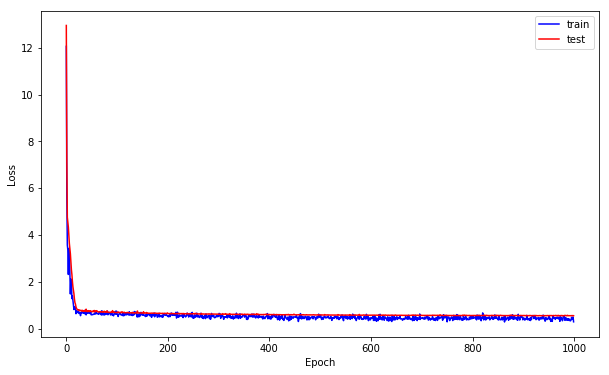

In [10]:
xaxis = [i for i in range(num_epoch)]

f = plt.figure(figsize=(10, 6))
plt.plot(xaxis, loss_train, c='blue', label='train')
plt.plot(xaxis, loss_test, c='red', label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


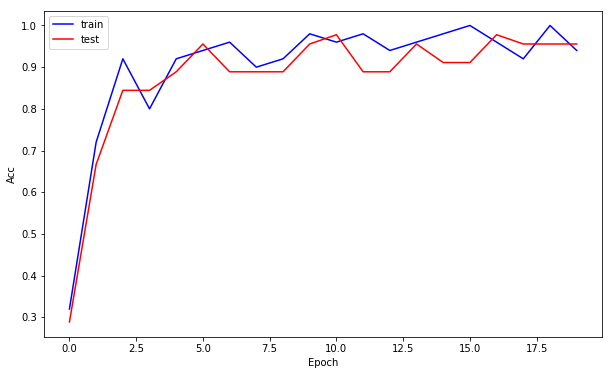

In [13]:
xaxis = [i for i in range(int(num_epoch/50))]

f = plt.figure(figsize=(10, 6))
plt.plot(xaxis, acc_train, c='blue', label='train')
plt.plot(xaxis, acc_test, c='red', label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show()
